In [10]:
import finnhub
finnhub_client = finnhub.Client(api_key="c9nb7siad3if6tl7helg")
print(finnhub_client.stock_social_sentiment('MSFT')['reddit'][0])

{'atTime': '2022-09-29 14:00:00', 'mention': 1, 'positiveScore': 0, 'negativeScore': -0.99021554, 'positiveMention': 0, 'negativeMention': 1, 'score': -1}


In [14]:
finnhub_client.recommendation_trends('TSLA')

[{'buy': 17,
  'hold': 11,
  'period': '2022-09-01',
  'sell': 4,
  'strongBuy': 14,
  'strongSell': 3,
  'symbol': 'TSLA'},
 {'buy': 19,
  'hold': 10,
  'period': '2022-08-01',
  'sell': 5,
  'strongBuy': 13,
  'strongSell': 3,
  'symbol': 'TSLA'},
 {'buy': 17,
  'hold': 11,
  'period': '2022-07-01',
  'sell': 6,
  'strongBuy': 14,
  'strongSell': 3,
  'symbol': 'TSLA'},
 {'buy': 15,
  'hold': 13,
  'period': '2022-06-01',
  'sell': 6,
  'strongBuy': 14,
  'strongSell': 3,
  'symbol': 'TSLA'}]

In [ ]:
import requests
#https://www.alphavantage.co/documentation/ DOC
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
api_key = 'KWIVGOI5GE1S8V14'
url = f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=COIN&topics=technology&apikey={api_key}&sort=LATEST&limit=200'

url=f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=COIN,CRYPTO:BTC,FOREX:USD&limit=200&apikey={api_key}'
r = requests.get(url)
data = r.json()

print(data)

In [ ]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
api_key = 'KWIVGOI5GE1S8V14'

url=f'https://www.alphavantage.co/query?function=HT_TRENDLINE&symbol=BTCUSDT&interval=daily&series_type=close&apikey={api_key}&datatype=csv'
r = requests.get(url)
#data = r.json()
print(r.text)
from io import StringIO
import csv
import pandas as pd

scsv = r.text
f = StringIO(scsv)
df_av = pd.read_csv(f, sep=",")
from datetime import datetime

def str_to_date(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d')

df_av.time = df_av.time.apply(str_to_date)
df_av.set_index('time', inplace=True)
df_av

In [104]:
from modules.Utils.utils import loadFromDB, computeFutureLinearRegression, strategyTester
from ta.trend import ema_indicator
import pandas as pd
SYMBOL= 'BTC'
df = loadFromDB(f'../backtest_tools/database/database/KuCoin/1d/{SYMBOL}-USDT.csv')
df['EMA'] = ema_indicator(df.Close, 20)
df.dropna(inplace=True)
print(df.shape)
df.head()

(952, 7)


,Open,High,Low,Close,Volume,Timestamp,EMA
Date,,,,,,,
2020-01-20 01:00:00,8704.6,8750.5,8529.2,8642.9,1060.905802,1579478400,8236.020967
2020-01-21 01:00:00,8642.9,8775.8,8452.2,8734.6,1047.234414,1579564800,8283.504684
2020-01-22 01:00:00,8734.6,8811.6,8600.0,8680.4,791.878045,1579651200,8321.304238
2020-01-23 01:00:00,8680.4,8687.0,8306.6,8409.0,1405.076803,1579737600,8329.656216
2020-01-24 01:00:00,8408.9,8524.5,8242.0,8437.9,1210.267018,1579824000,8339.965147


In [105]:
import numpy as np
def addFNG(x):
    try:
        return df_av.loc[pd.to_datetime(x.name).date().strftime("%Y-%m-%d")].HT_TRENDLINE
    except:
        return np.nan
    
df['A_V'] = df.apply(addFNG,axis=1)
df

,Open,High,Low,Close,Volume,Timestamp,EMA,A_V
Date,,,,,,,,
2020-01-20 01:00:00,8704.6,8750.5,8529.2,8642.9,1060.905802,1579478400,8236.020967,NaN
2020-01-21 01:00:00,8642.9,8775.8,8452.2,8734.6,1047.234414,1579564800,8283.504684,NaN
2020-01-22 01:00:00,8734.6,8811.6,8600.0,8680.4,791.878045,1579651200,8321.304238,NaN
2020-01-23 01:00:00,8680.4,8687.0,8306.6,8409.0,1405.076803,1579737600,8329.656216,NaN
2020-01-24 01:00:00,8408.9,8524.5,8242.0,8437.9,1210.267018,1579824000,8339.965147,NaN
...,...,...,...,...,...,...,...,...
2022-08-24 02:00:00,21528.4,21894.6,21151.4,21366.7,7573.228464,1661299200,22496.915422,23008.4116
2022-08-25 02:00:00,21366.6,21815.1,21308.7,21557.5,5675.160154,1661385600,22407.447287,22901.1691
2022-08-26 02:00:00,21557.5,21874.9,20107.3,20239.8,13639.082723,1661472000,22201.004688,22749.1952


In [106]:
df.dropna(inplace=True)
df

,Open,High,Low,Close,Volume,Timestamp,EMA,A_V
Date,,,,,,,,
2021-05-03 02:00:00,56568.5,58977.9,56451.3,57159.7,4780.433872,1620000000,55853.690863,56444.5536
2021-05-04 02:00:00,57159.7,57188.2,53083.3,53196.3,7079.558047,1620086400,55600.606019,56373.2175
2021-05-05 02:00:00,53196.3,57979.7,52888.0,57431.5,6154.551585,1620172800,55774.976874,56280.3542
2021-05-06 02:00:00,57431.5,58362.4,55242.0,56397.6,6418.750561,1620259200,55834.274315,55970.6926
2021-05-07 02:00:00,56397.7,58643.2,55244.6,57307.3,6550.041578,1620345600,55974.562475,55639.1258
...,...,...,...,...,...,...,...,...
2022-08-24 02:00:00,21528.4,21894.6,21151.4,21366.7,7573.228464,1661299200,22496.915422,23008.4116
2022-08-25 02:00:00,21366.6,21815.1,21308.7,21557.5,5675.160154,1661385600,22407.447287,22901.1691
2022-08-26 02:00:00,21557.5,21874.9,20107.3,20239.8,13639.082723,1661472000,22201.004688,22749.1952


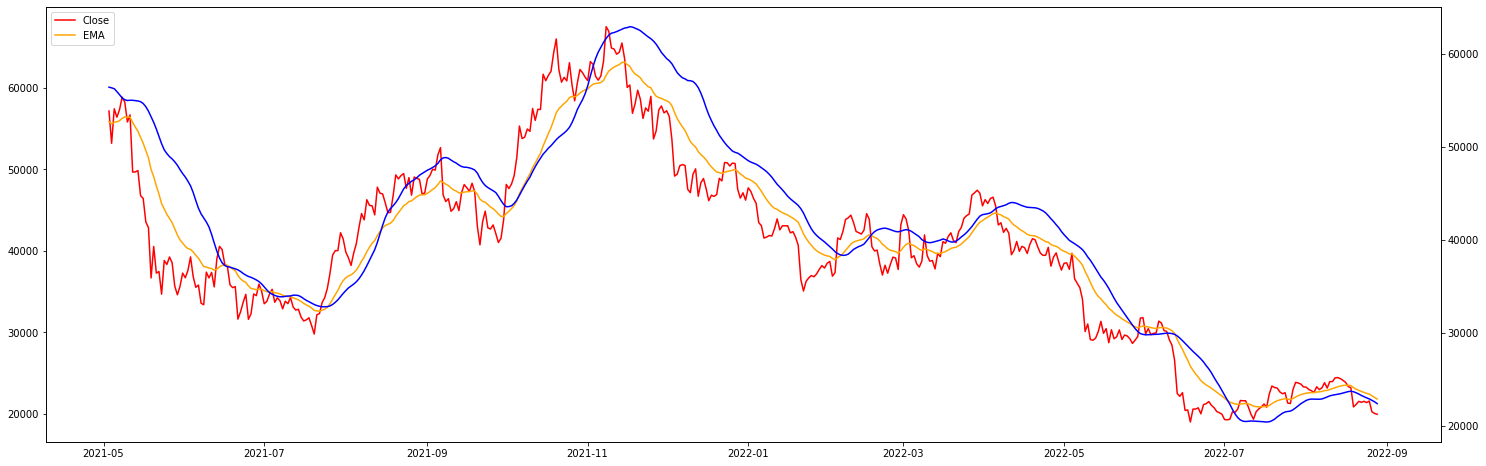

In [107]:
import matplotlib.pyplot as plt
fig, ax_left = plt.subplots(1, figsize=(25,8))


ax_right = ax_left.twinx()

ax_left.plot(df.Close, color='red',label='Close')
ax_left.plot(df.EMA, color='orange',label='EMA')
ax_right.plot(df.A_V, color='blue',label='A_V')
ax_left.legend(loc="upper left")

/home/baptiste/windowsdisk/_sharedFS/Python/python-trading-bot/modules/Utils/utils.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
/home/baptiste/windowsdisk/_sharedFS/Python/python-trading-bot/modules/Utils/utils.py:175: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
/home/baptiste/windowsdisk/_sharedFS/Python/python-trading-bot/modules/Utils/utils.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
/home/baptiste/windowsdisk/_sharedFS/Python/python-trading-bot/modules/Utils/utils.py:175: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

Period : [2021-05-03 02:00:00] -> [2022-08-28 02:00:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 975.31 $
Performance vs US Dollar : -2.47 %
Buy and Hold Performence : -65.12 %
Performance vs Buy and Hold : -96.21 %
Best trade : +40.18 %, the 2021-11-06 01:00:00
Worst trade : -19.11 %, the 2021-06-22 02:00:00
Worst drawBack : -33.0 %
Total fees :  16.95 $

----- Trades Informations -----
Total trades on period : 13
Number of positive trades : 4
Number of negative trades :  9
Trades win rate ratio : 30.77 %
Average trades performance : 1.32 %
Average positive trades : 23.74 %
Average negative trades : -8.64 %

----- Plot -----


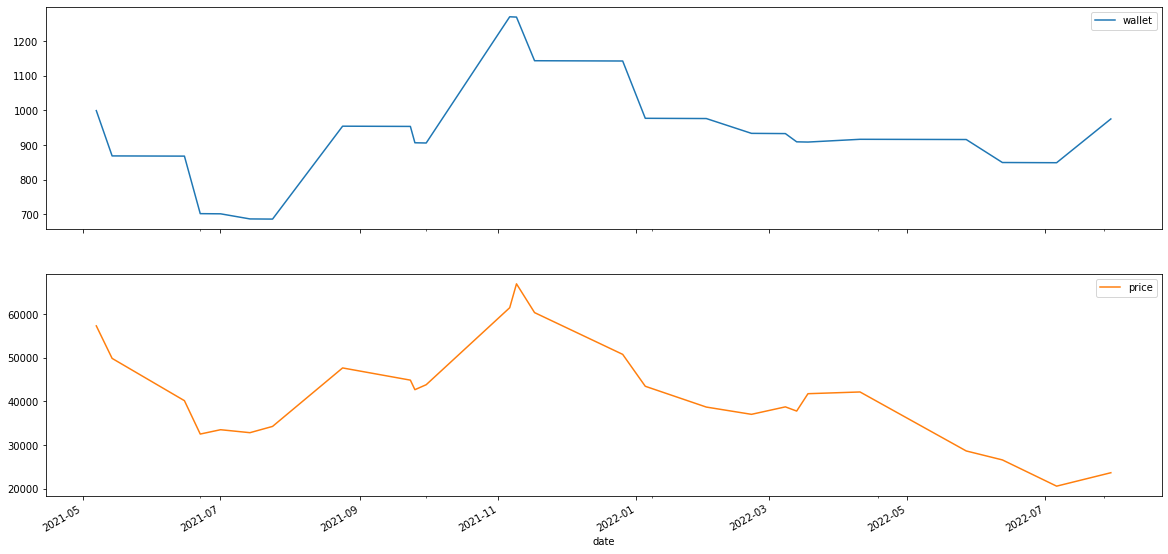

In [108]:
def buyCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if row.EMA>row.A_V else False

def sellCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if row.EMA<row.A_V else False

strategyTester(df,buyCondition,sellCondition,equity=1000)